<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/Clothes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Básicos
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np

# Artifial Neural Networds (ANN)
import tensorflow as tf
from tensorflow import keras


In [ ]:
print('Version TensorFlow: ', tf.__version__)
print('Version Keras: ', keras.__version__)

Version TensorFlow:  2.2.0
Version Keras:  2.3.0-tf


**Fashion MINIST**

1. El conjunto de datos se encuentra dividido en entrenamiento y prueba.
2. Debido a que son imagenes los valores están normailizados entre 0 y 1, para ello se divide en 255. 

In [ ]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print('Training samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])
print('Validation samples: ', X_valid.shape[0])


4423680/4422102 [==============================] - 0s 0us/step
Training samples:  55000
Test samples:  10000
Validation samples:  5000


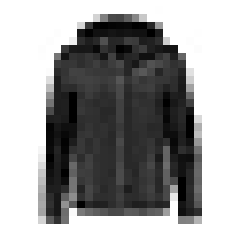

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
print('Labels: ', set(y_train))

Labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

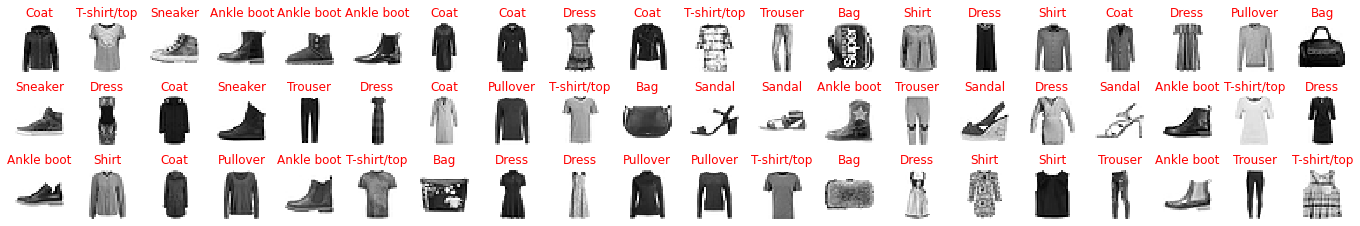

In [ ]:
n_rows = 3
n_cols = 20
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12, c='r')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Estructuración de la Red Neuronal (VERSION 1)**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),                 # Input Layer (Para este caso únicamante convitio la matriz en un vector de caraterísticas)
    
    keras.layers.Dense(300, activation="relu",name='Hidden1'),  # Hidden layer 1
    keras.layers.Dense(100, activation="relu",name='Hidden2'),  # Hidden layer 2
    keras.layers.Dense(10, activation="softmax",name='Output')  # Output layer (la cual depende de la aplicación, para este caso son 10 porque es el número de labels)
])

In [ ]:
# Creación de la estrucutura interna de la Red
keras.backend.clear_session()  # Reiniciar todo lo que se ha utilizado 
np.random.seed(42)             # Semillas fijas?     
tf.random.set_seed(42)         # Modelo de inicialización de valores internos de la red neuronal


In [ ]:
# Impresión de la estrucura de la Red Neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


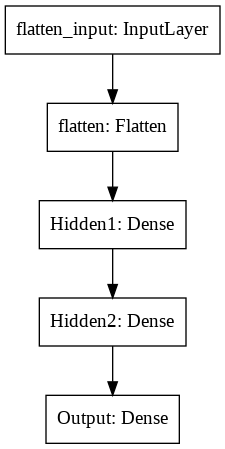

In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
tf.keras.utils.plot_model(model)

**Compilación del modelo**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",    # Función de costo a derivar
              optimizer="sgd",                           # Optimización: gradiente descendente     
              metrics=["accuracy"])                      # Monitoriar la medida de desempeño (no lo deriva-> solo para ver la tarea final)   

history = model.fit(X_train,                             # Conjunto de entrenamiento
                    y_train,                             # Etiquetas 
                    epochs=30,                           # Epocas: número de veces que se ejecutaran el algoritmo de backpropagation 
                    validation_data=(X_valid, y_valid))  # Conjunto de validación (evaluar el desempeño)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7207 - accuracy: 0.7618 - val_loss: 0.5242 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4895 - accuracy: 0.8276 - val_loss: 0.4379 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4429 - accuracy: 0.8439 - val_loss: 0.5416 - val_accuracy: 0.7948
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4151 - accuracy: 0.8543 - val_loss: 0.3968 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3962 - accuracy: 0.8608 - val_loss: 0.3781 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8663 - val_loss: 0.3708 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8713 - val_loss: 0.3648 - val_accuracy:

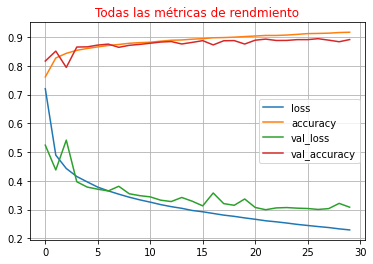

In [ ]:
hpd = pd.DataFrame(history.history)

hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

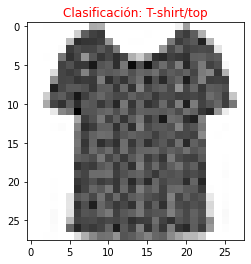

[[0.53 0.   0.01 0.   0.   0.   0.47 0.   0.   0.  ]]


In [ ]:
ii = 1000
pe = model.predict(X_test[ii][np.newaxis,:,:])

probabilidad = 'Clasificación: ' + class_names[np.argmax(pe.round(2))]
plt.title(probabilidad, c='r')
plt.imshow(X_test[ii],cmap='binary',vmin=0,vmax=1)
plt.show()

print(pe.round(2))


In [ ]:
X_test[ii].shape

(28, 28)